# Problem Sheet 7 - Nonnegative Matrix Factorization
In this exercise we consider the Nonnegative Matrix Factorization (NMF) of a matrix $A\in\mathbb{R}^{m,n}$, $A_{i,j}\geq 0$, into
$$
A \approx WH
$$
with $W\in\mathbb{R}^{m,r}$ and $H\in\mathbb{R}^{r,n}$ and additionally $W,H\geq 0$ componentwise.

In [1]:
import numpy as np
from scipy import linalg as la
from scipy import optimize
import numpy.matlib

#initialize (pseudo) random number generator for reproducible results
np.random.seed(1234)

#build random 20x10 matrix
m=20
n=10
A=np.random.rand(m,n)

## Nonnegative Matrix Factorization using Alternating Least Squares (ALS)

**Task:** Implement the NMF using ALS.

ALS in each iteration of NMF:
*   First, compute $W:= \max \left\{ \underset{\tilde{W}\in\mathbb{R}^{m,r}}{\arg\min} \|{A-\tilde{W}H}\|_F, 0 \right\}$ with component-wise $\max$.
*   Then, compute $H:= \max \left\{ \underset{\tilde{H}\in\mathbb{R}^{r,n}}{\arg\min} \|{A-W\tilde{H}}\|_F, 0 \right\}$ with component-wise $\max$.

**Hint:** For the general problem $\underset{S}{\arg\min} \|{A-GSK^T}\|_F^2$, the derivative is given by
$$
\frac{\mathrm{d}}{\mathrm{d}S} \frac{1}{2} \|GSK^T - A\|_F^2 = G^T(GSK^T-A)K
$$
and is equal to zero for
$$
 \hat{S} = (G^TG)^{-1} G^T A \, K (K^T K)^{-1}.
$$
You can use this for the update of $W$ and $H$ by setting the factors $G$ and $K^T$ to the identity, respectively.

In [2]:
#NMF based on Alternating Least Squares (ALS)
def nmf_als(A,r,maxit=15,rel_stopping=1e-3):
    m,n = A.shape
    W=np.random.rand(m,r)
    H=np.random.rand(r,n)
    
    for it in range(maxit):
        # update H
        H = H #Placeholder! Change!
        # update W
        W = W #Placeholder! Change!
        
        #optional:
        #if stopping criterion: break
        
    print('nmf_als iter:', it+1)
    return W,H

Test your code. The output should be around 0.25:

In [3]:
W,H = nmf_als(A,5,50,1e-16)
print(np.linalg.norm(A-W@H,'fro') / np.linalg.norm(A,'fro'))

nmf_als iter: 50
1.5853875919414975


Next, we consider images from a face database.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


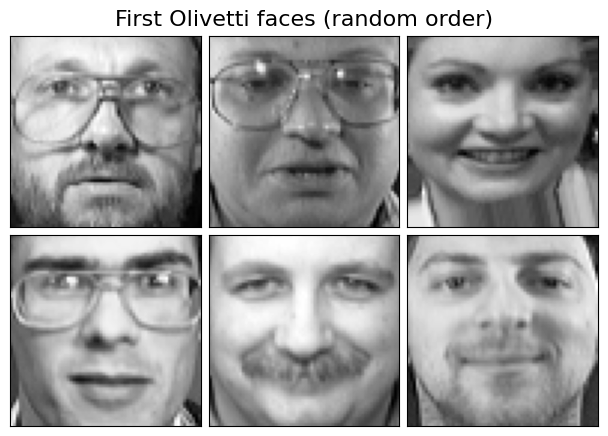

In [4]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

def plot_gallery(title, images, n_row=2, n_col=3, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(image_shape), cmap=cmap)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = np.random.RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

plot_gallery("First Olivetti faces (random order)", faces[:n_components])

**Task:** Run the following code, which uses your implementation of the NMF with ALS, several times. Why are the images showing columns of $W$ different each time?

nmf_als iter: 50
[[0.72523929 0.97378891 0.53548188]
 [0.444798   0.02211118 0.60598834]
 [0.96479652 0.96759148 0.93002881]
 ...
 [0.1917822  0.19676212 0.42656507]
 [0.50652087 0.11795847 0.38453611]
 [0.77000852 0.94028363 0.2247174 ]]
[[0.05986105 0.95556539 0.92900798 ... 0.47570432 0.09358102 0.02040601]
 [0.06263777 0.99899007 0.57278502 ... 0.83099263 0.62879174 0.04344984]
 [0.98310999 0.40878708 0.4273786  ... 0.33636582 0.62649678 0.83262253]]


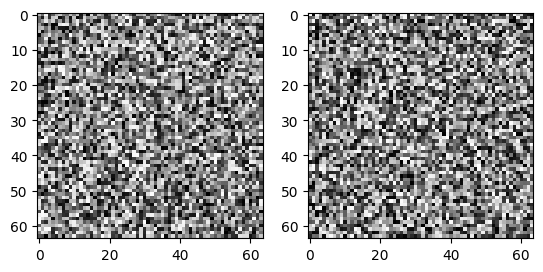

In [5]:
X = faces.T

W, H = nmf_als(X,3,50,1e-16)

print(W)
print(H)

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(W[:,0],(64,64)),cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(W[:,1],(64,64)),cmap=plt.cm.gray)
plt.show()

## NMF with Multiplicative Updates
**Task:** Implement the NMF using Multiplicative Updates (instead of ALS). Compare the different approaches numerically.

In [6]:
#NMF based on multiplicative updates
def nmf_multiplicative(A,r,maxit=15,rel_stopping=1e-3):
    m,n = A.shape
    W=np.random.rand(m,r)
    H=np.random.rand(r,n)
    
    for it in range(maxit):
        # update H
        H = H #Placeholder! Change!
        # update W
        W = W #Placeholder! Change!
        
        #optional:
        #if stopping criterion: break
        
    print('nmf_multiplicative iter:', it+1)
    return W,H